## EDA - Estefania Martinez Castillo

In [247]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [248]:
data = pd.read_csv('03 CSV data -- STC(A)_numerical dates.csv')

In [249]:
data.head(10)

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0,1,A,40557,40557,...,K,Elementary,K->Elementary,H,1,0.063646,0.936508,4,L,1
1,2,HC,8.0,8.0,AZ,0,7,A,40557,40564,...,Middle,Middle,Middle->Middle,H,1,0.025882,0.880000,3,L,1
2,3,HD,8.0,8.0,FL,0,3,A,40558,40560,...,Middle,Middle,Middle->Middle,H,1,0.025131,0.888889,3,L,1
3,4,HN,9.0,12.0,VA,1,3,B,40558,40560,...,Undefined,Undefined,Undefined->Undefined,H,0,NaN,1.000000,0,NaN,0
4,5,HD,6.0,8.0,FL,0,6,T,40559,40564,...,Middle,Middle,Middle->Middle,H,0,0.112500,0.910112,8,M-L,0
5,6,HC,10.0,12.0,LA,0,4,A,40560,40563,...,High,High,High->High,H,0,0.010650,0.909091,1,L,1
6,7,SG,11.0,12.0,MA,1,6,A,40561,40566,...,High,High,High->High,S,0,0.111111,0.925926,2,S,0
7,8,FN,9.0,9.0,MX,0,8,A,40567,40574,...,Undefined,Undefined,Undefined->Undefined,I,1,NaN,0.928571,1,NaN,0
8,9,CC,8.0,8.0,AZ,0,8,A,40572,40579,...,Middle,High,Middle->High,C,1,0.104000,0.928571,4,S-M,1
9,10,HD,8.0,8.0,TX,0,4,A,40581,40584,...,PK,Middle,PK->Middle,H,1,0.103937,0.916667,6,M-L,1


In [250]:
data.isna().sum()

ID                                   0
Program.Code                         0
From.Grade                         127
To.Grade                           150
Group.State                          0
Is.Non.Annual.                       0
Days                                 0
Travel.Type                          0
Departure.Date                       0
Return.Date                          0
Deposit.Date                         0
Special.Pay                       1919
Tuition                              0
FRP.Active                           0
FRP.Cancelled                        0
FRP.Take.up.percent.                 0
Early.RPL                          673
Latest.RPL                          19
Cancelled.Pax                        0
Total.Discount.Pax                   0
Initial.System.Date                  8
Poverty.Code                       599
Region                               0
CRM.Segment                          4
School.Type                          0
Parent.Meeting.Flag      

In [251]:
missing_data = data.isna().sum()
total_missing_data = missing_data.sum()
print('Total de datos faltantes:', total_missing_data)

Total de datos faltantes: 5318


In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2389 non-null   int64  
 1   Program.Code                    2389 non-null   object 
 2   From.Grade                      2262 non-null   float64
 3   To.Grade                        2239 non-null   float64
 4   Group.State                     2389 non-null   object 
 5   Is.Non.Annual.                  2389 non-null   int64  
 6   Days                            2389 non-null   int64  
 7   Travel.Type                     2389 non-null   object 
 8   Departure.Date                  2389 non-null   int64  
 9   Return.Date                     2389 non-null   int64  
 10  Deposit.Date                    2389 non-null   int64  
 11  Special.Pay                     470 non-null    object 
 12  Tuition                         23

In [253]:
data['From.Grade'].unique()
data['To.Grade'].unique()
data['Days'].unique()
data['Group.State'].unique()

array(['CA', 'AZ', 'FL', 'VA', 'LA', 'MA', 'MX', 'TX', 'IA', 'MI', 'NY',
       'NC', 'OH', 'MN', 'AR', 'IL', 'IN', 'WI', 'MO', 'ID', 'TN', 'KS',
       'AL', 'MS', 'KY', 'OR', 'NE', 'CO', 'SC', 'NM', 'HI', 'OK', 'AK',
       'GA', 'NJ', 'WA', 'NV', 'RI', 'MT', 'CT', 'Cayman Islands', 'PR',
       'UT', 'PA', 'ME', 'MD', 'VT', 'NH', 'AB', 'Bermuda', 'WV', 'SD',
       'ND', 'WY'], dtype=object)

In [254]:
data['Group.State'].value_counts()

Group.State
CA                718
TX                308
WA                147
IL                104
CO                 89
MI                 71
FL                 62
AZ                 53
OH                 53
MN                 51
OR                 51
WI                 46
IN                 43
MO                 43
NE                 42
TN                 38
MA                 36
IA                 35
OK                 33
LA                 31
KS                 26
GA                 22
AL                 21
NV                 20
NM                 20
NY                 19
VA                 18
KY                 16
NC                 16
MD                 15
CT                 15
ID                 14
SD                 11
AR                 10
SC                 10
HI                  9
MS                  9
UT                  9
ME                  7
NH                  7
MT                  6
NJ                  6
AK                  5
PA                  5
ND                  

In [255]:
data['Is.Non.Annual.'].unique()
data['Travel.Type'].unique()

array(['A', 'B', 'T', 'N'], dtype=object)

In [256]:
data['Poverty.Code'].unique()

array(['B', 'C', nan, 'D', 'A', 'E', '0'], dtype=object)

In [257]:
data['School.Type'].unique()

array(['PUBLIC', 'CHD', 'Catholic', 'Private non-Christian'], dtype=object)

In [258]:
data['MDR.Low.Grade'].unique()

array(['K', '7', '6', nan, '10', '9', 'PK', '5', '3', '2', '1', '4', '8'],
      dtype=object)

In [259]:
data['Income.Level'].unique()

array(['Q', 'A', 'O', nan, 'C', 'I', 'G', 'K', 'L', 'P5', 'N', 'H', 'E',
       'M', 'P', 'P1', 'J', 'P3', 'Z', 'B', 'F', 'D', 'P4'], dtype=object)

In [260]:
data['Income.Level'].value_counts()

Income.Level
Q     283
O     266
L     214
P     212
M     189
J     160
I     159
N     148
K     123
F     105
G      91
H      85
E      80
C      67
Z      44
D      41
B      33
A      20
P1      2
P3      2
P4      2
P5      1
Name: count, dtype: int64

In [261]:
data['GroupGradeTypeLow'].unique()

array(['K', 'Middle', 'Undefined', 'High', 'PK', 'Elementary'],
      dtype=object)

In [262]:
data['GroupGradeTypeLow'].value_counts()

GroupGradeTypeLow
Middle        1250
K              428
PK             401
Elementary     135
High           107
Undefined       68
Name: count, dtype: int64

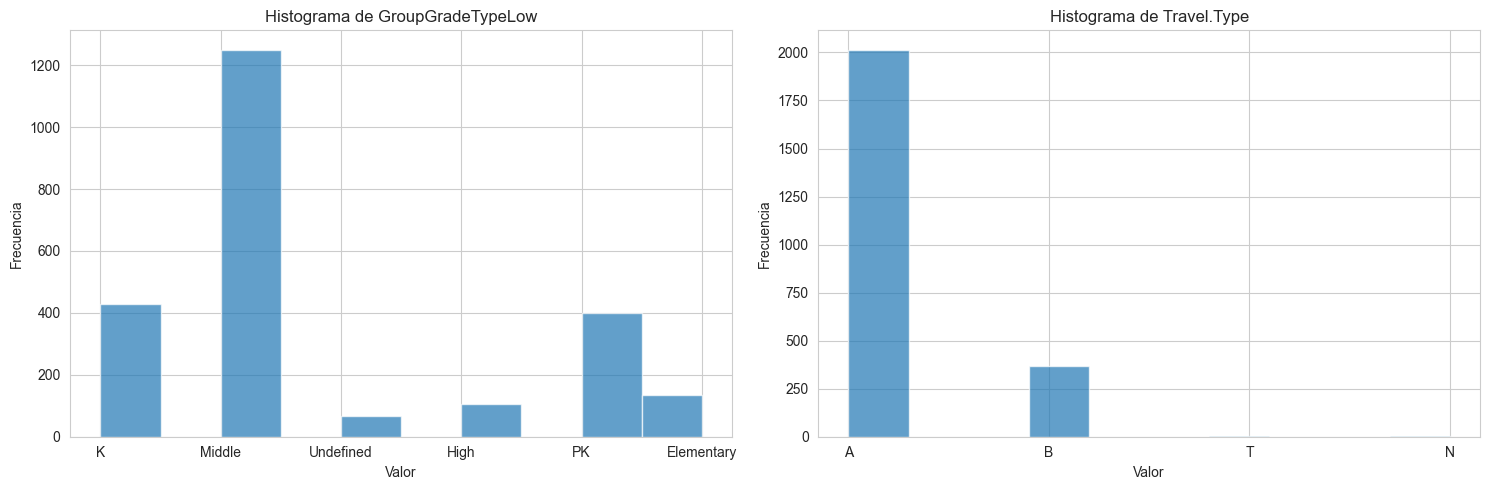

In [263]:
columnas = ['GroupGradeTypeLow', 'Travel.Type']  

fig, axs = plt.subplots(1, len(columnas), figsize=(15, 5))  # 1 fila y tantas columnas como variables

for i, columna in enumerate(columnas):
    axs[i].hist(data[columna], bins=10, alpha=0.7)
    axs[i].set_title(f'Histograma de {columna}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frecuencia')

plt.tight_layout()

plt.show()

In [264]:
data['GroupGradeTypeLow'] = data['GroupGradeTypeLow'].replace('K', 'Middle')
data['GroupGradeTypeLow'] = data['GroupGradeTypeLow'].replace('PK', 'Middle')
data['GroupGradeTypeLow'].unique()

array(['Middle', 'Undefined', 'High', 'Elementary'], dtype=object)

In [265]:
data['Group.State'].unique()

array(['CA', 'AZ', 'FL', 'VA', 'LA', 'MA', 'MX', 'TX', 'IA', 'MI', 'NY',
       'NC', 'OH', 'MN', 'AR', 'IL', 'IN', 'WI', 'MO', 'ID', 'TN', 'KS',
       'AL', 'MS', 'KY', 'OR', 'NE', 'CO', 'SC', 'NM', 'HI', 'OK', 'AK',
       'GA', 'NJ', 'WA', 'NV', 'RI', 'MT', 'CT', 'Cayman Islands', 'PR',
       'UT', 'PA', 'ME', 'MD', 'VT', 'NH', 'AB', 'Bermuda', 'WV', 'SD',
       'ND', 'WY'], dtype=object)

In [266]:
category_frequency = data['Group.State'].value_counts()
categories_replacement = category_frequency[category_frequency < 10].index
data['Group.State'] = data['Group.State'].replace(categories_replacement, 'OTHER')

data['Group.State'].unique()


array(['CA', 'AZ', 'FL', 'VA', 'LA', 'MA', 'OTHER', 'TX', 'IA', 'MI',
       'NY', 'NC', 'OH', 'MN', 'AR', 'IL', 'IN', 'WI', 'MO', 'ID', 'TN',
       'KS', 'AL', 'KY', 'OR', 'NE', 'CO', 'SC', 'NM', 'OK', 'GA', 'WA',
       'NV', 'CT', 'MD', 'SD'], dtype=object)

In [267]:
data.loc[data['Travel.Type'] == 'N']

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
1256,1257,HD,6.0,8.0,OTHER,0,4,N,40685,40688,...,Middle,Middle,PK->Middle,H,0,0.192308,0.769231,3,S,0
1609,1610,HD,8.0,8.0,OH,0,4,N,40698,40701,...,Middle,Middle,PK->Middle,H,1,0.043902,0.900000,1,S,0


In [268]:
data = data.drop(data[data['Travel.Type'] == 'N'].index[:])
data['Travel.Type'].unique()

array(['A', 'B', 'T'], dtype=object)

In [269]:
#pip install seaborn

<Axes: xlabel='Travel.Type', ylabel='SPR.Group.Revenue'>

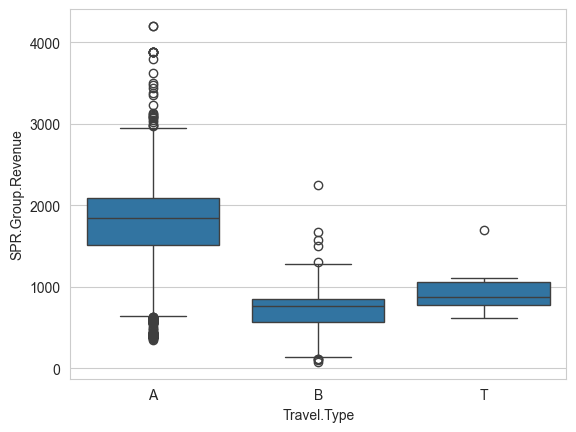

In [270]:
import seaborn as sns
sns.boxplot(data= data, 
            x = 'Travel.Type', y = 'SPR.Group.Revenue')

<Axes: xlabel='Poverty.Code', ylabel='SPR.Group.Revenue'>

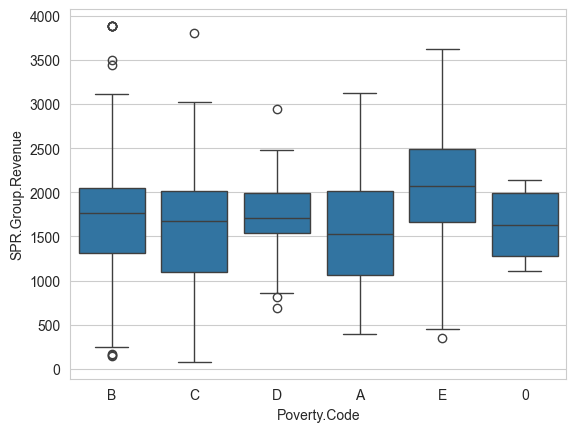

In [271]:
sns.boxplot(data= data, 
            x = 'Poverty.Code', y = 'SPR.Group.Revenue')

In [272]:
data.loc[data['Poverty.Code'] == '0']

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
205,206,CD,8.0,8.0,NM,0,5,A,40617,40621,...,Middle,High,PK->High,C,1,0.020125,0.906250,3,L,1
550,551,CD,8.0,8.0,CA,1,6,A,40637,40642,...,Middle,High,K->High,C,1,0.015601,0.909091,1,M-L,0
665,666,CD,8.0,8.0,MO,0,4,A,40645,40648,...,Middle,Middle,PK->Middle,C,1,0.124324,0.920000,2,S,1
909,910,HD,8.0,8.0,NY,0,4,T,40659,40662,...,Middle,Middle,PK->Middle,H,1,0.042071,0.866667,2,S,0


In [273]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2387.0,1194.800168,690.024759,1.000000,597.500000,1194.000000,1792.500000,2389.000000
From.Grade,2260.0,7.268584,1.388623,3.000000,7.000000,8.000000,8.000000,12.000000
To.Grade,2237.0,7.912830,1.558921,3.000000,8.000000,8.000000,8.000000,12.000000
Is.Non.Annual.,2387.0,0.154168,0.361186,0.000000,0.000000,0.000000,0.000000,1.000000
Days,2387.0,4.575618,1.432631,1.000000,4.000000,5.000000,5.000000,12.000000
Departure.Date,2387.0,40670.746963,35.226778,40557.000000,40642.000000,40680.000000,40701.000000,40724.000000
Return.Date,2387.0,40674.481776,35.253197,40557.000000,40645.000000,40683.000000,40704.000000,40729.000000
Deposit.Date,2387.0,40475.828655,37.918787,40081.000000,40466.000000,40479.000000,40487.000000,40846.000000
Tuition,2387.0,1616.053205,644.718645,79.000000,1180.000000,1701.000000,2048.000000,4200.000000
FRP.Active,2387.0,16.876833,16.946959,0.000000,6.000000,12.000000,23.000000,257.000000


In [274]:
data['Poverty.Code'] = data['Poverty.Code'].replace('0', 'E')
data['Poverty.Code'].value_counts()

Poverty.Code
B    961
C    507
A    265
D     36
E     21
Name: count, dtype: int64

In [275]:
data.loc[data['School.Type'] != 'PUBLIC', 'School.Type'] = 'PRIVATE'
data['School.Type'].value_counts()

School.Type
PUBLIC     1818
PRIVATE     569
Name: count, dtype: int64

In [276]:
pd.crosstab(data['MDR.High.Grade'], data['MDR.Low.Grade'])

MDR.Low.Grade,1,10,2,3,4,5,6,7,8,9,K,PK
MDR.High.Grade,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,1,1
2.0,0,0,0,0,0,0,0,0,0,0,1,0
3.0,0,0,0,0,0,0,0,0,0,0,1,0
4.0,0,0,1,0,0,0,0,0,0,0,1,4
5.0,0,0,0,5,1,0,0,0,0,0,67,26
6.0,1,0,0,2,1,10,4,0,0,0,61,31
7.0,0,0,0,0,1,4,10,1,0,0,3,6
8.0,6,0,0,4,13,78,840,245,3,0,241,227
9.0,0,0,0,0,0,0,3,36,7,3,3,2


In [277]:
pd.crosstab(data['CRM.Segment'], data['MDR.Low.Grade'])

MDR.Low.Grade,1,10,2,3,4,5,6,7,8,9,K,PK
CRM.Segment,,,,,,,,,,,,
1.0,0,0,0,0,2,2,18,4,1,0,22,27
2.0,0,0,0,0,0,2,14,3,1,0,9,17
3.0,0,0,0,0,0,0,4,0,0,0,4,0
4.0,3,0,1,7,2,7,4,0,0,0,133,71
5.0,3,0,0,0,5,16,330,141,5,1,152,135
6.0,0,0,0,0,0,2,52,18,0,16,4,2
7.0,0,0,0,0,0,3,25,12,0,0,3,8
8.0,0,3,0,0,0,0,0,7,0,83,0,0
9.0,0,0,0,0,0,0,0,2,0,4,0,2


In [278]:
pd.crosstab(data['GroupGradeTypeLow'], data['From.Grade'])

From.Grade,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
GroupGradeTypeLow,,,,,,,,,,
Elementary,0,3,11,12,36,61,1,1,0,0
High,0,0,0,3,3,6,38,13,21,3
Middle,5,150,81,204,466,1035,28,9,11,5
Undefined,0,7,2,6,10,18,8,1,0,2


In [279]:
pd.crosstab(data['MajorProgramCode'], data['From.Grade'])

From.Grade,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
MajorProgramCode,,,,,,,,,,
C,0,0,4,10,25,82,2,1,4,1
H,3,159,89,159,423,1018,47,16,22,7
I,0,0,0,0,0,0,3,1,0,0
S,2,1,1,56,67,20,23,6,6,2


In [280]:
pd.crosstab(data['MajorProgramCode'], data['To.Grade'])

To.Grade,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
MajorProgramCode,,,,,,,,,,
C,0,0,1,6,2,104,4,1,2,9
H,1,132,62,46,51,1440,82,11,17,82
I,0,0,0,0,0,0,1,0,0,3
S,0,0,0,5,22,100,10,3,4,36


In [281]:
data['Income.Level'] = data['Income.Level'].replace('0', 'Q')
data['Income.Level'] = data['Income.Level'].replace('P1', 'P')
data['Income.Level'] = data['Income.Level'].replace('P3', 'P')
data['Income.Level'] = data['Income.Level'].replace('P4', 'P')
data['Income.Level'] = data['Income.Level'].replace('P5', 'P')
data['Income.Level'].unique()

array(['Q', 'A', 'O', nan, 'C', 'I', 'G', 'K', 'L', 'P', 'N', 'H', 'E',
       'M', 'J', 'Z', 'B', 'F', 'D'], dtype=object)

In [282]:
data['Departure.Date'] = (pd.to_datetime('1899-12-30') + 
                          pd.to_timedelta(data['Departure.Date'].astype(int), unit = 'D'))

data['Return.Date']  = (pd.to_datetime('1899-12-30') + 
                          pd.to_timedelta(data['Return.Date'].astype(int), unit = 'D'))

data['Deposit.Date']  = (pd.to_datetime('1899-12-30') + 
                          pd.to_timedelta(data['Deposit.Date'].astype(int), unit = 'D'))


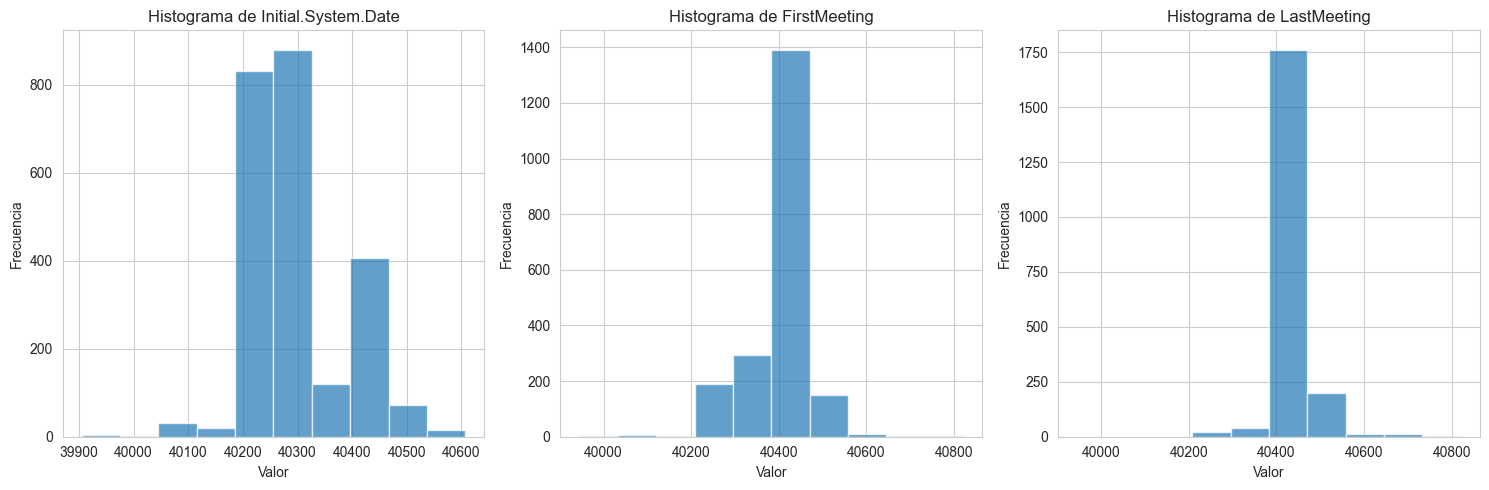

In [283]:
columnas = ['Initial.System.Date', 'FirstMeeting','LastMeeting']  

fig, axs = plt.subplots(1, len(columnas), figsize=(15, 5))  # 1 fila y tantas columnas como variables

for i, columna in enumerate(columnas):
    axs[i].hist(data[columna], bins=10, alpha=0.7)
    axs[i].set_title(f'Histograma de {columna}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frecuencia')

plt.tight_layout()

plt.show()

In [284]:
data['Initial.System.Date'].value_counts()

Initial.System.Date
40236.0    58
40227.0    46
40282.0    40
40256.0    33
40263.0    32
           ..
40527.0     1
40064.0     1
40086.0     1
40390.0     1
40366.0     1
Name: count, Length: 296, dtype: int64

In [285]:
data['FirstMeeting'].value_counts()

FirstMeeting
40435.0    113
40444.0     77
40449.0     77
40443.0     72
40437.0     71
          ... 
40405.0      1
40433.0      1
40387.0      1
40221.0      1
40393.0      1
Name: count, Length: 207, dtype: int64

In [286]:
data['LastMeeting'].value_counts()

LastMeeting
40435.0    145
40449.0     99
40444.0     95
40443.0     95
40437.0     89
          ... 
40339.0      1
40689.0      1
40590.0      1
40645.0      1
40708.0      1
Name: count, Length: 172, dtype: int64

In [287]:
data['Initial.System.Date'].fillna(40236, inplace = True)
data['FirstMeeting'].fillna(40435, inplace = True)
data['LastMeeting'].fillna(40435, inplace = True)

C:\Users\eecc1\AppData\Local\Temp\ipykernel_16008\1392873089.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Initial.System.Date'].fillna(40236, inplace = True)
C:\Users\eecc1\AppData\Local\Temp\ipykernel_16008\1392873089.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2387 entries, 0 to 2388
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2387 non-null   int64         
 1   Program.Code                    2387 non-null   object        
 2   From.Grade                      2260 non-null   float64       
 3   To.Grade                        2237 non-null   float64       
 4   Group.State                     2387 non-null   object        
 5   Is.Non.Annual.                  2387 non-null   int64         
 6   Days                            2387 non-null   int64         
 7   Travel.Type                     2387 non-null   object        
 8   Departure.Date                  2387 non-null   datetime64[ns]
 9   Return.Date                     2387 non-null   datetime64[ns]
 10  Deposit.Date                    2387 non-null   datetime64[ns]
 11  Special.P

In [289]:
data['Initial.System.Date']  = (pd.to_datetime('1899-12-30') + 
                          pd.to_timedelta(data['Initial.System.Date'].astype(int), unit = 'D'))

data['FirstMeeting']  = (pd.to_datetime('1899-12-30') + 
                          pd.to_timedelta(data['FirstMeeting'].astype(int), unit = 'D'))

data['LastMeeting']  = (pd.to_datetime('1899-12-30') + 
                          pd.to_timedelta(data['LastMeeting'].astype(int), unit = 'D'))

In [290]:
data['Special.Pay'].isna().sum()/len(data)

0.8031001256807708

In [291]:
#Creación o transformación de variables

In [292]:
data['DepositToTravel'] = (data['Departure.Date'] - data['Deposit.Date']).dt.days
data['AgreeToDeposit'] = (data['Deposit.Date'] - data['Initial.System.Date']).dt.days
data['MeetingToDeposit'] = (data['Deposit.Date'] - data['FirstMeeting']).dt.days

In [293]:
data['FRP.FPP'] = round(data['FPP']*data['FRP.Take.up.percent.'])

In [294]:
data.head(10)

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.,DepositToTravel,AgreeToDeposit,MeetingToDeposit,FRP.FPP
0,1,HS,4.0,4.0,CA,0,1,A,2011-01-14,2011-01-14,...,1,0.063646,0.936508,4,L,1,137,157,18,25.0
1,2,HC,8.0,8.0,AZ,0,7,A,2011-01-14,2011-01-21,...,1,0.025882,0.880000,3,L,1,425,44,-2,9.0
2,3,HD,8.0,8.0,FL,0,3,A,2011-01-15,2011-01-17,...,1,0.025131,0.888889,3,L,1,92,260,32,17.0
3,4,HN,9.0,12.0,VA,1,3,B,2011-01-15,2011-01-17,...,0,NaN,1.000000,0,NaN,0,8,80,115,0.0
4,5,HD,6.0,8.0,FL,0,6,T,2011-01-16,2011-01-21,...,0,0.112500,0.910112,8,M-L,0,108,191,37,40.0
5,6,HC,10.0,12.0,LA,0,4,A,2011-01-17,2011-01-20,...,0,0.010650,0.909091,1,L,1,109,198,-18,9.0
6,7,SG,11.0,12.0,MA,1,6,A,2011-01-18,2011-01-23,...,0,0.111111,0.925926,2,S,0,95,232,-32,16.0
7,8,FN,9.0,9.0,OTHER,0,8,A,2011-01-24,2011-01-31,...,1,NaN,0.928571,1,NaN,0,115,129,23,10.0
8,9,CC,8.0,8.0,AZ,0,8,A,2011-01-29,2011-02-05,...,1,0.104000,0.928571,4,S-M,1,242,110,-99,30.0
9,10,HD,8.0,8.0,TX,0,4,A,2011-02-07,2011-02-10,...,1,0.103937,0.916667,6,M-L,1,105,208,41,51.0


In [295]:
#Eliminando variables no relevantes o con gran cantidad de NA
data.drop(['Special.Pay', 'ID', 'Program.Code', 'Early.RPL', 'Latest.RPL',
                  'FirstMeeting',
                  'LastMeeting',
                  'SchoolGradeType',
                  'GroupGradeType', 'Departure.Date', 'Return.Date', 'Deposit.Date', 'Initial.System.Date', 'LastMeeting', 'FirstMeeting', 'FRP.Take.up.percent.'
           ], axis=1, inplace = True)

In [296]:
data

,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Tuition,FRP.Active,FRP.Cancelled,Cancelled.Pax,...,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.,DepositToTravel,AgreeToDeposit,MeetingToDeposit,FRP.FPP
0,4.0,4.0,CA,0,1,A,424,25,3,3,...,1,0.063646,0.936508,4,L,1,137,157,18,25.0
1,8.0,8.0,AZ,0,7,A,2350,9,9,11,...,1,0.025882,0.880000,3,L,1,425,44,-2,9.0
2,8.0,8.0,FL,0,3,A,1181,17,6,6,...,1,0.025131,0.888889,3,L,1,92,260,32,17.0
3,9.0,12.0,VA,1,3,B,376,0,0,1,...,0,NaN,1.000000,0,NaN,0,8,80,115,0.0
4,6.0,8.0,FL,0,6,T,865,40,8,9,...,0,0.112500,0.910112,8,M-L,0,108,191,37,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,7.0,8.0,CA,0,5,A,1892,18,4,7,...,0,0.018980,0.921053,3,L,0,195,41,92,18.0
2385,8.0,8.0,CA,0,5,A,1699,16,4,4,...,1,0.034783,0.909091,2,S-M,1,257,171,162,16.0
2386,10.0,12.0,CA,0,6,A,2149,0,0,0,...,0,NaN,0.882353,4,NaN,1,162,41,126,0.0
2387,4.0,4.0,CA,0,1,A,449,3,2,1,...,1,NaN,0.941176,1,NaN,1,195,104,92,3.0


In [297]:
data['From.Grade'] = data['From.Grade'].astype('category')
data['To.Grade'] = data['To.Grade'].astype('category')
data['Is.Non.Annual.'] = data['Is.Non.Annual.'].astype('category')
data['Parent.Meeting.Flag'] = data['Parent.Meeting.Flag'].astype('category')
data['CRM.Segment'] = data['CRM.Segment'].astype('category')
data['MDR.High.Grade'] = data['MDR.High.Grade'].astype('category')
data['MDR.Low.Grade'] = data['MDR.Low.Grade'].astype('category')
data['School.Sponsor'] = data['School.Sponsor'].astype('category')
data['SingleGradeTripFlag'] = data['SingleGradeTripFlag'].astype('category')


In [298]:
#pip install scikit-learn

In [299]:
from sklearn.impute import SimpleImputer

In [300]:
imputer = SimpleImputer(missing_values = np.nan, strategy='constant')
imputer.fit(data.select_dtypes(exclude=['int64','float64']))
data[data.select_dtypes(exclude=['int64','float64']).columns] = (
    imputer.transform(data.select_dtypes(exclude=['int64','float64'])))
           
# fixing numericals 
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
imputer.fit(data.select_dtypes(include=['int64','float64']))
data[data.select_dtypes(include=['int64','float64']).columns] = (
    imputer.transform(data.select_dtypes(include=['int64','float64'])))

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2387 entries, 0 to 2388
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   From.Grade                      2387 non-null   object 
 1   To.Grade                        2387 non-null   object 
 2   Group.State                     2387 non-null   object 
 3   Is.Non.Annual.                  2387 non-null   object 
 4   Days                            2387 non-null   float64
 5   Travel.Type                     2387 non-null   object 
 6   Tuition                         2387 non-null   float64
 7   FRP.Active                      2387 non-null   float64
 8   FRP.Cancelled                   2387 non-null   float64
 9   Cancelled.Pax                   2387 non-null   float64
 10  Total.Discount.Pax              2387 non-null   float64
 11  Poverty.Code                    2387 non-null   object 
 12  Region                          2387 no

In [302]:
#Tabla cruzada de los retenidos por estado
pd.crosstab(data['Group.State'], data['Retained.in.2012.'])

Retained.in.2012.,0.0,1.0
Group.State,,
AL,8,13
AR,6,4
AZ,17,36
CA,244,474
CO,42,47
CT,3,12
FL,18,44
GA,9,13
IA,18,17


In [303]:
conteo_categorias = data['Group.State'].value_counts()

conteo_categorias_ordenado = conteo_categorias.sort_values(ascending=False)

top_15_categorias = conteo_categorias_ordenado.head(15)

In [304]:
states = top_15_categorias.reset_index()
states.columns = ['States', 'Count']
states

,States,Count
0,CA,718
1,TX,308
2,WA,147
3,IL,104
4,CO,89
5,OTHER,81
6,MI,71
7,FL,62
8,AZ,53
9,OH,52


In [305]:
#pip install seaborn

<Axes: xlabel='Is.Non.Annual.', ylabel='count'>

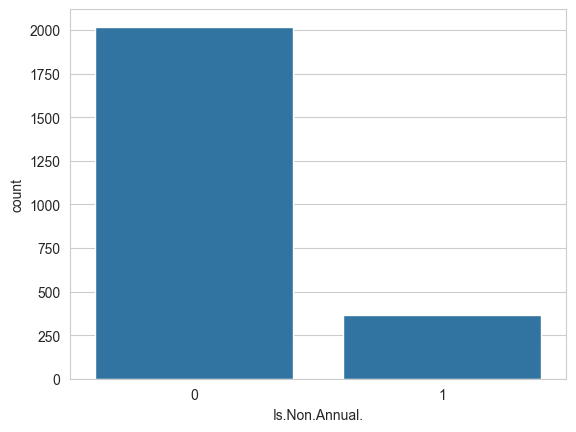

In [306]:
subset_1 = data['Is.Non.Annual.'].value_counts().reset_index()
sns.barplot(x = 'Is.Non.Annual.', y = 'count', data = subset_1)

In [307]:
subset_1['percentage'] = ""
for i in range(2):
  subset_1.percentage[i] = subset_1['count'][i]/data.shape[0]

subset_1

C:\Users\eecc1\AppData\Local\Temp\ipykernel_16008\1385051192.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  subset_1.percentage[i] = subset_1['count'][i]/data.shape[0]
C:\Users\eecc1\AppData\Local\Temp\ipykernel_16008\1385051192.py:3: S

,Is.Non.Annual.,count,percentage
0,0,2019,0.845832
1,1,368,0.154168


<Axes: xlabel='School.Sponsor', ylabel='count'>

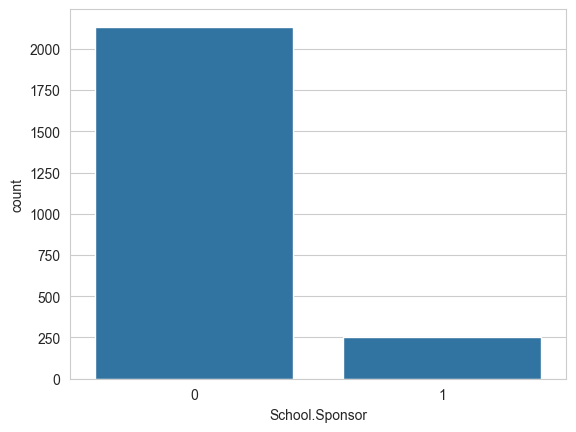

In [308]:
subset_2 = data['School.Sponsor'].value_counts().reset_index()
sns.barplot(x = 'School.Sponsor', y = 'count', data = subset_2)

<Axes: xlabel='Retained.in.2012.', ylabel='count'>

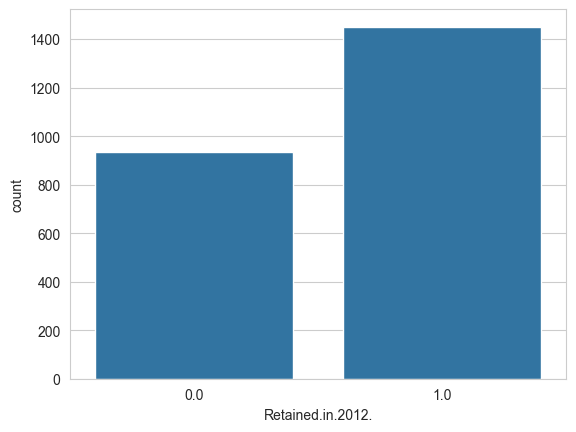

In [309]:
subset_3 = data['Retained.in.2012.'].value_counts().reset_index()
sns.barplot(x = 'Retained.in.2012.', y = 'count', data = subset_3)

In [310]:
subset_3['percentage'] = ""
for i in range(2):
  subset_3.percentage[i] = subset_3['count'][i]/data.shape[0]

subset_3

C:\Users\eecc1\AppData\Local\Temp\ipykernel_16008\2976302199.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  subset_3.percentage[i] = subset_3['count'][i]/data.shape[0]
C:\Users\eecc1\AppData\Local\Temp\ipykernel_16008\2976302199.py:3: S

,Retained.in.2012.,count,percentage
0,1.0,1451,0.607876
1,0.0,936,0.392124


<Axes: xlabel='Tuition'>

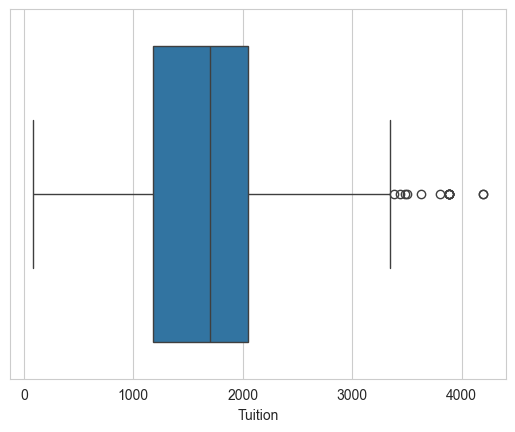

In [311]:
sns.boxplot(data=data, x='Tuition')

In [312]:
big_states = data['Group.State'].value_counts()

sort_states = big_states.sort_values(ascending = False)

top_15_states = sort_states.head(15)

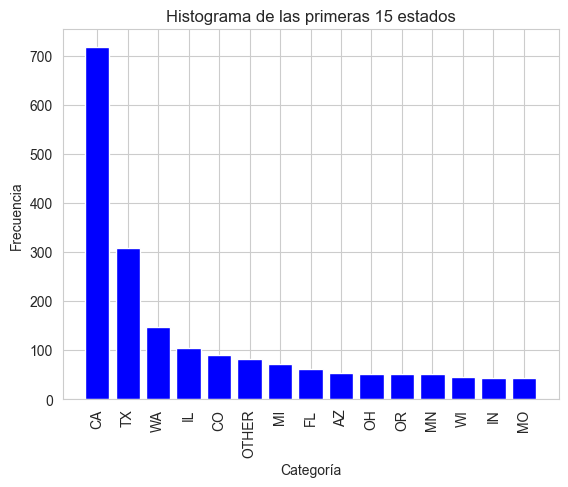

In [313]:
plt.bar(top_15_states.index, top_15_states.values, color='blue')

# Añadir títulos y etiquetas
plt.title('Histograma de las primeras 15 estados')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=90)

# Mostrar el histograma
plt.show()

In [314]:
big_states = top_15_states.reset_index()

In [315]:
big_states.columns = ['States', 'count']
big_states

,States,count
0,CA,718
1,TX,308
2,WA,147
3,IL,104
4,CO,89
5,OTHER,81
6,MI,71
7,FL,62
8,AZ,53
9,OH,52


<Axes: xlabel='Group.State', ylabel='Tuition'>

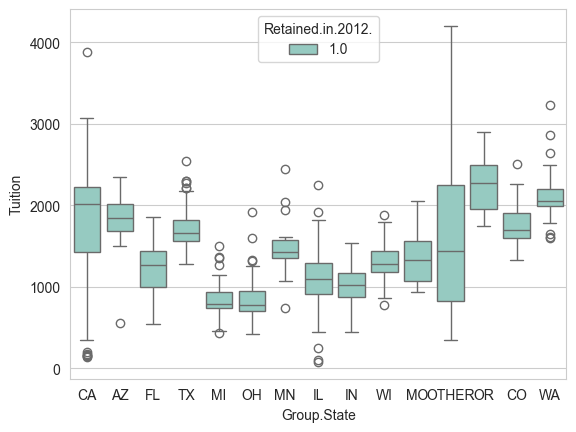

In [316]:
sns.boxplot(data= data[data['Group.State'].isin(big_states['States']) & data['Retained.in.2012.'] == 1], 
            x = 'Group.State', y = 'Tuition', hue = 'Retained.in.2012.', palette='Set3')

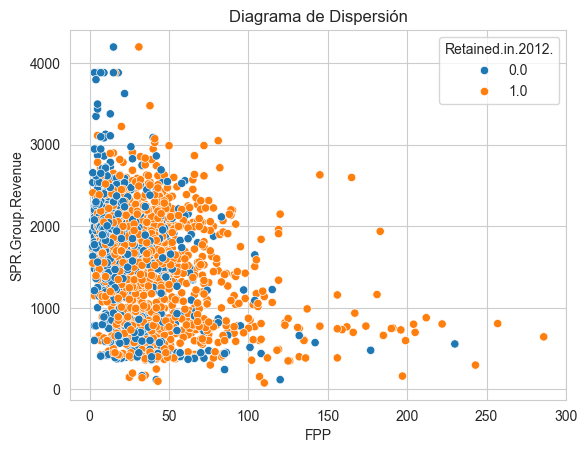

In [317]:
sns.scatterplot(x='FPP', y='SPR.Group.Revenue', data=data, hue = 'Retained.in.2012.')

plt.title('Diagrama de Dispersión')

plt.show()

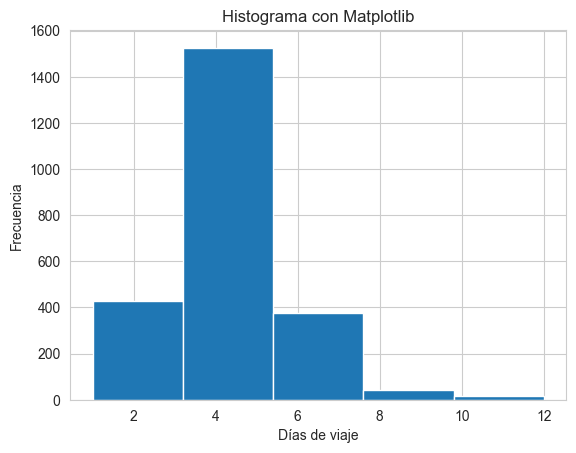

In [319]:
plt.hist(data['Days'], bins=5)
plt.xlabel('Días de viaje')
plt.ylabel('Frecuencia')
plt.title('Histograma con Matplotlib')

plt.show()

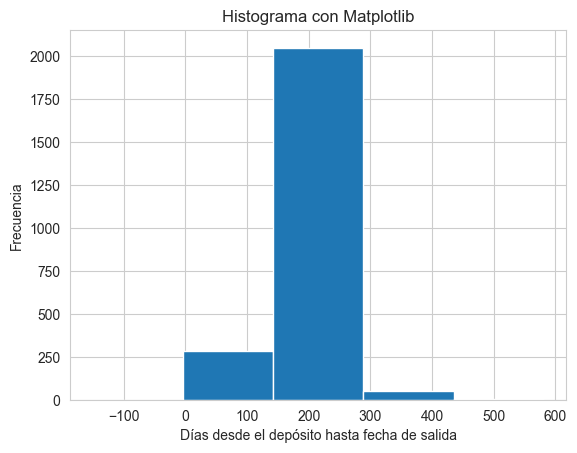

In [321]:
plt.hist(data['DepositToTravel'], bins=5)
plt.xlabel('Días desde el depósito hasta fecha de salida')
plt.ylabel('Frecuencia')
plt.title('Histograma con Matplotlib')

plt.show()

In [322]:
numeric_variables = data.select_dtypes(include=['number'])

In [323]:
correlation_matrix = numeric_variables.corr()

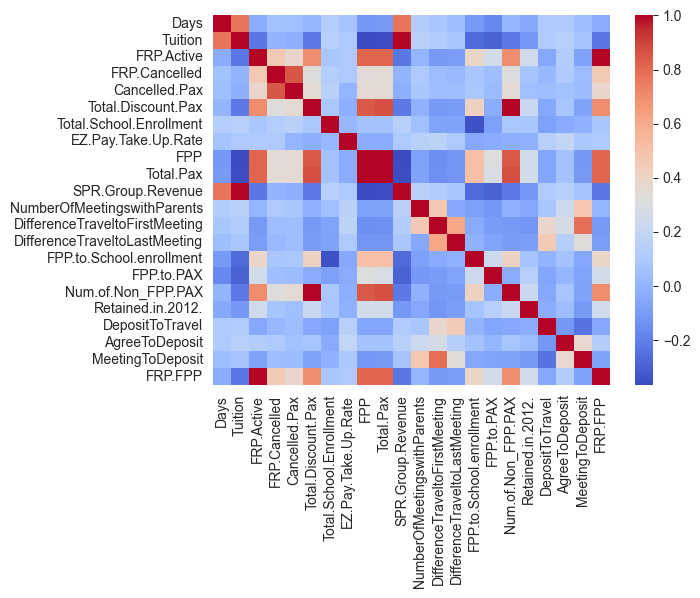

In [325]:
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()